In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
DATA_DIR = Path("../data/03_secondary/")

In [3]:
data_files = [path for d in DATA_DIR.glob('*/') for path in d.glob('*.feather')]
len(data_files)

76

In [4]:
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 150
pd.options.display.html.use_mathjax = False

In [5]:
%time df = pd.concat([pd.read_feather(f) for f in data_files], ignore_index=True)

CPU times: user 1.54 s, sys: 460 ms, total: 2 s
Wall time: 1.84 s


In [6]:
pd.options.display.max_rows = 100

# Convenience

In [7]:
df['annual'] = df.salary_hours == 2000

In [8]:
df['weekly'] = df.salary_hours == 40

In [9]:
df['daily'] = df.salary_hours == 8

In [10]:
df['hourly'] = df.salary_hours == 1

In [11]:
sum(df.annual), sum(df.weekly), sum(df.daily), sum(df.hourly)

(6471, 141, 2494, 4702)

# Fix up salary_min being zero

Take a range of e.g. \\$0 - \\$30,000 as simply \\$30,000

In [12]:
zero_salary = df.salary_min <= 0

In [13]:
df["salary_low"] = df["salary_min"].astype("float")

In [14]:
df.loc[zero_salary, "salary_low"] = df["salary_max"].astype("float")

In [15]:
df.loc[df["salary_low"] <= 0, "salary_low"] = np.nan

In [16]:
df["salary_hi"] = df["salary_max"].astype(float)

In [17]:
df.loc[zero_salary, "salary_hi"] = np.nan

In [18]:
df["salary_valid"] = ~df["salary_low"].isna()

# Check salary ranges

In [19]:
df['pct_salary_range'] = (2 * (df.salary_hi - df.salary_low) / (df.salary_hi + df.salary_low))

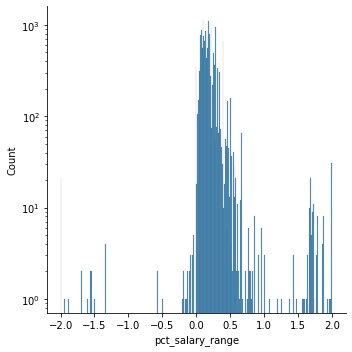

In [20]:
sns.displot(df, x='pct_salary_range', log=True)

These are a mix of data and parsing errors mainly.

In [21]:
df[df.pct_salary_range < 0].sort_values("pct_salary_range", ascending=False).T

,63599,56453,64389,51887,24311,12435,15939,14756,66978,65907,56155,57303,64093,65883,57174,64504,57089,65941,30645,60969,66461,59159,68619,52477,30451,...,63103,68120,38574,51715,18651,12004,53780,61361,39699,60780,54663,70478,69884,4234,2043,2048,4231,9747,9748,9749,9753,724,714,24953,68286
title,Estates/Litigation Lawyer *Exclusively Listed with Legal People*,Insurance/Transport Lawyer (3 years Plus exp.),Estates/Litigation Lawyer *Exclusively Listed with Legal People*,Planning & Environment Lawyer,Legal Personal Assistant - Rare 1 on 1 Role!,Contracts Administrator,Contracts Administrator,Contracts Administrator,Senior 12D Designer. Big projects?,Civil Engineer - Principal. $177-162K. Admired team leader?,Senior Structural Engineer,Senior Communications Specialist,Principal Structural Engineer. $157-142K.,Senior Civil Engineer - Roads,Senior Structural Engineer $147-129K,Civil Drafter - Mid Level - Urban Development,Civil Associate $167-144K,Senior Tax Accountant,"Quantity Surveyor Commercial Contractor, Tauranga",Senior Accountant $87-72K,Civil Engineer. Urban Infrastructure,Structural Principal $187-152k,Road Designers 12D,Full-Stack Mobile Developer,Project Coordinator / Project Administrator,...,Intermediate Accountant - Top 50 Chartered Accounting firm - Sydney CBD,AUDITOR - TOP 50 FIRM - SYDNEY CBD - $70-90K,Management Accountant,Outreach Librarian,Senior Project Manager,Senior Project Manager,Senior Civil Engineer - Land and Urban Development Portfolio,Senior Practice Leader,"Management Consultant/ Head, Operations Excellence",Finance Manager - Insurance - Decision support role,Senior Executive Assistant,Early Childhood Educator,Early Childhood Educator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Strategy and Assets Coordinator,Partner Support Officer,OSHC Educator
description,,,,"About our client... Our client is a prestigious commercial law firm located in stunning offices, located in the heart of public transport, gyms an...","Are you a talented Legal Personal Assistant wanting “that something extra” in your role? If so, this role will certainly appeal. About the ...",About the Company\nEstablished over 40 years ago this highly respected builder who are highly regarded throughout Queensland are looking to add a ...,About the Company\nEstablished over 40 years ago this highly respected builder who are highly regarded throughout Queensland are looking to add a ...,About the Company\nEstablished over 40 years ago this highly respected builder who are highly regarded throughout Queensland are looking to add a ...,,,,,,,,,,,We are seeking a seeking a QS to become part of the cohesive and professional team within this well recognized regional commercial contractor. Th...,,,,,Are you ready to make the move into an inspiring team without the political road blocks that will allow you to drive innovation? Currently we have...,"Are you a Project Coordinator / Project Administrator with incredible service & delivery skills, wanting to join one of the fastest growing & inno...",...,,,Management Accountant\n\nPart Time - 30.5 hours per week\nSalary $78.3K to $85.2K (Band 6) + 9.5% Super\nLocation - Broadford\n\nMitchell Shire Co...,One of Australias leading research & teaching universities Vibrant campus life with a strong sense of community & inclusion Enjoy a career that m...,Senior Project Manager - Roads\nOur Client:\nOur client is a state-wide Government organisation within the Transport sector who have expressed int...,Senior Project Manager - Roads\nOur Client:\nOur client is a state-wide Government organisation within the Transport sector who have expressed int...,Join us! This consultancy works with some of the Australia's largest property developers. They commit to world's best

In [22]:
df.loc[df.pct_salary_range < 0, "salary_valid"] = False

A lot of crazy ranges, up to ~1.5 actually occur in the data, espeically for sales roles with variable income (it's safe to say the real income is at the bottom of the range).
The rest are data/parsing errors.

Most of these ranges are pretty useless.

In [23]:
df[df.pct_salary_range > .7].sort_values('pct_salary_range').T

,68903,68838,23201,57159,18179,3563,667,11682,5911,24127,5592,3981,32572,35961,37972,59537,4148,5894,34767,35652,26830,8252,33312,9413,3915,...,61633,60054,55842,53156,65538,53526,53388,1127,8267,10301,17097,14226,52432,66166,12027,18705,20657,19078,20613,20646,19511,19059,20630,20584,53816
title,Financial Advice & Sales,Financial Advice & Sales,Real Estate Sales Agent/Assistant,Auto Electrician - Heavy Earthmoving Equipment Experience,"OHW Engineers (Engineer, Senior & Principal)",Chief Executive Officer - City of Melbourne,Project Manager - Contract,"OHW Engineers (Engineer, Senior & Principal)",Project Manager - Contract,EXPERIENCED & CORDIAL FUNCTION WAIT STAFF,Sales Manager - Gold Coast,Sales Manager - Gold Coast,window Server consultant,window Server consultant,Customer Service | Entry level,Mid Level Drupal Developer (Contract),Android Developer- NAB,Android Developer- NAB,"Business Development Manager - NSW, ACT & QLD","Business Development Manager - NSW, ACT & QLD",Professional PERMANENT and TEMPORARY job opportunities!,Administrator,"Business Development Manager - NSW, ACT & QLD",Business Improvement Manager,Business Improvement Manager,...,Acountant - Business Services Manager - $145 - $120K Add value to your Career,Construction Litigation Associate,Senior Accountant,Business Services Senior Accountant,Senior Accountant,Business Services Assistant Manager,Business Services Manager,Business Analyst,Business Analyst,Business Analyst,Senior Civil Drafter,Senior Civil Drafter,Director - Childcare Centre Manager - Early Childhood,Crew Leader,Senior Tunnel Engineer,Senior Tunnel Engineer,Lead Practitioner Children & Family Services,Counsellor – Crime Victims & General,Counsellor & Parent Educator,Domestic & Family Violence Counsellor,Industrial Officer,Case Manager Family & Community Wellbeing,Case Manager Community Mental Health,Union Organiser,Baker/Pastry Chef
description,,,About the business A well-established agency for over 30 years is looking for a motivated residential salesperson who is self motivated and is e...,,"CGC are working with a highly professional, world leading design and engineering consultancy. They have a highly enviable reputation and offer fle...",The City of Melbourne is a capital city council with ambitious plans for a fast-growing Melbourne.\nReporting to a highly engaged Lord Mayor and C...,About the Company\nLeading university looking for a project manager to start immediately – 6 month contract\nAbout the Role\n\n6 month contract wi...,"CGC are working with a highly professional, world leading design and engineering consultancy. They have a highly enviable reputation and offer fle...",About the Company\nLeading university looking for a project manager to start immediately – 6 month contract\nAbout the Role\n\n6 month contract wi...,What's in it for you?Top hourly rates from $26.03 per hour paid weekly.Work at reputable establishments all over Canberra from Stadiums to Hotels ...,"About the Company\nDavidson are recruiting to a Sales Professional – Home and land sale packages for our Client who are a successful, growing busi...","About the Company\nDavidson are recruiting to a Sales Professional – Home and land sale packages for our Client who are a successful, growing busi...",Your role is to migration legacy applications running on legacy servers Microsoft Server.\nYou will need the following skills\n\nAdvanced Windows ...,Your role is to migration legacy applications running on legacy servers Microsoft Server.\nYou will need the following skills\n\nAdvanced Windows ...,"Entry Level | Customer Service\nIf you have no corporate experience and wish to enter the NSW government space, these roles are not to be missed! ...",,"About the Company\nThis business is a true household name across Austalia. They are a well renowned, located in the CBD and they have an outstandi...","About the Company\nThis business is a true household name across Austalia. They are a well renowned, located in the CBD an

In [24]:
df.loc[df.pct_salary_range > 1.5, "salary_valid"] = False

## Overall Minimum Salary

CPU times: user 350 ms, sys: 103 ms, total: 452 ms
Wall time: 326 ms


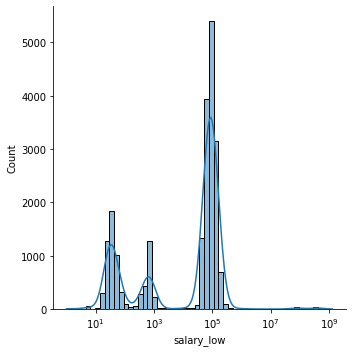

In [25]:
%time sns.displot(df, x="salary_low", log_scale=True, kde=True)

CPU times: user 379 ms, sys: 65.8 ms, total: 445 ms
Wall time: 319 ms


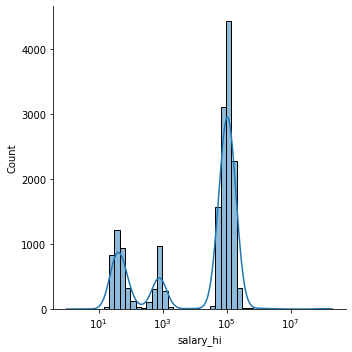

In [26]:
%time sns.displot(df, x="salary_hi", log_scale=True, kde=True)

Above about 500k it gets suss

In [27]:
df[df.salary_low > 500_000].sort_values("salary_low").T

,34383,32963,36900,6001,5873,4212,4138,39504,5599,3990,13992,12789,3827,380,9323,32722,34105,127,3315,4491,9064,330,3678,1657,17909,...,60805,60404,58749,66306,61941,57673,61590,61461,61308,63620,69190,30719,22825,60435,64851,67031,56031,68308,55116,55205,54382,55609,54317,60277,56599
title,Receptionist POC,Receptionist POC,Draftsperson,UX/UI Designer,Front End Developer,UX/UI Designer,Front End Developer,Marketing and Events Coordinator,Document Controller,Document Controller,Office Manager / Accountant,Office Manager / Accountant,Senior Android Engineer,Senior Android Engineer,Senior Android Engineer,Full Stack Developer,Full Stack Developer,Signallers,Senior Quantity Surveyor,Senior Quantity Surveyor,Lead Commissioning Engineer,Lead Commissioning Engineer,Lead Commissioning Engineer,Lead Commissioning Engineer,General Foreman,...,Principal Structure Engineer - Up to $211K. Accelerate your Career?,12d Designer $108-85K. Great time to choose,Registered Surveyors $161-128K Multiple Choices,Business Services Manager $130-105K,Contracts Administrator - Commercial,Contracts Administrator - Construction,Estimator (QS) - Commercial Construction Projects over $40M,Contracts Administrator - Commercial,Estimator (QS) - Commercial Construction Projects over $40M,Outbound Sales Consultant - Join a Market Leader - Legal Tech Company,Debt Collection Officer,Corporate/Commercial Counsel 2-5 PAE- 3 month contract - Large IT Company!!,Inhouse Corporate Legal Counsel (4 year PAE +) - National Property Advisory Firm,Business Services Accountants. SYDNEY ROLES,CT Radiographer - Regional NSW,MRI Technician / MRI Radiographer,Rookie GP Representative - Eastern Suburbs - multiple positions,Employment and IR 2-5Yrs PQE,Temporary Conveyancing Paralegal Required,Estimator,Civil Project Manager,Contract Administrator,Project Engineer,Structural Drafter REVIT - Immediate Start!,Maintenance Planner - HME
description,"Our client, a multi-service IT provider is currently seeking an experienced Receptionist for a permanent full time position. In this diverse role ...","Our client, a multi-service IT provider is currently seeking an experienced Receptionist for a permanent full time position. In this diverse role ...",Your new company\nHays are currently working with a reputable company based in the Canberra region. This particular company work on large scale co...,"My client is a large corporation with operations across the world. They have their headquarters based in Brisbane, giving you access to global pro...",My client is a large corporation with operations across the world. They are currently expanding their team due to increased project work. They are...,"My client is a large corporation with operations across the world. They have their headquarters based in Brisbane, giving you access to global pro...",My client is a large corporation with operations across the world. They are currently expanding their team due to increased project work. They are...,"Northern Territory PHN leads the development and coordination of an equitable, comprehensive primary health care system and an engaged health work...","About the Company\nDavidson are currently working with one of the world’s largest names in wind energy. This company manufactures, installs and se...","About the Company\nDavidson are currently working with one of the world’s largest names in wind energy. This company manufactures, installs and se...","The Company\nProject Management Consultancy who specialise in a range of project sectors valued up to $120 Million, have an exciting and extremely...","The Company\nProject Management Consultancy who specialise in a range of project sectors valued up to $120 Million, have an exciting and extremely...",One of Melbourne's most desirable start-ups are looking to hire a Senior Android Developer to join their team of high performing developers.\nBein...,One of Melbourne's most desirable start-ups are looking to hire a Senior Android Developer to join their team

Below 15 it's mostly garbage

In [28]:
df[df.salary_low < 15].sort_values("salary_low", ascending=False).T

,22495,70099,33446,56590,4756,35215,34908,70436,34342,27168,35941,40049,33740,32932,60928,60179,18705,12027,10360,34056,35491,58947,40428,54330,36064,...,21332,32918,34321,21477,38223,53332,20340,60406,73404,62523,55618,71605,72094,72335,20251,60471,30895,53743,57695,65419,65418,64792,59921,60391,36538
title,Fundraising and Support Officer,Apprentice Gardener,Lifecycle Marketing Manager,Project Engineer - Substations,C# .NET Software Developer,Direct Product Manager - Insurance,Lifecycle Marketing Manager,Junior Java Software Developer,Executive Manager of Product and Services,Senior Test Analyst - 12m Fixed Term,Direct Product Manager - Insurance,Business Operations Manager,Direct Product Manager - Insurance,Executive Manager of Product and Services,Diplomatic Safety Assurance and Audit Leader,Sponsorship & Events Producer,Senior Tunnel Engineer,Senior Tunnel Engineer,C# .NET Software Developer,Test post from idibu,Test post from idibu,Customer Support Team Leader,Refrigeration Apprenticeship,Looking for a 1st or 2nd year Landscape Apprentice,Fulfillment Centre Operations Manager - Night Shifts,...,Looking for female cleaner and cook,SAP Customer Management,SAP Customer Management,Graduate Accountant Trainee Internship 3 months,Behaviour Support Practitioner,Senior ServiceNow Technical Consultant / Developer,Living Skills Support Worker,Senior Occupational Therapist - General Medicine and Surgery,Executive Director - People & Performance,Air Track Driller - Contract role,Light Vehicle Fitter - Mt Morgans,"Chief Engineer - Department of Planning, Transport and Infrastructure","Chief Engineer - Department of Planning, Transport and Infrastructure","Chief Engineer - Department of Planning, Transport and Infrastructure",DFV Residential Support Worker,Senior Manager - Product Communications,"Cadet Program 2020 - Information Technology Stream, Sydney",Construction Lawyer,Business Analyst,Project Lawyer,Project Lawyer,VR GP - Melbourne,ServiceNow Professional? Looking For a New Role?,Hospital Physiotherapist - Rural Generalist - permanent - July/August start date,Animal Attendant
description,"About Canteen We help young people cope with cancer in their family. Through CanTeen, they learn to explore and deal with their feelings about can...",,"Our Client\nBased in the CBD, our client is a global eCommerce provider and a household name for consumers to sell and purchase online. They provi...",,"My client is looking for experienced .NET Developers to join their agile environment working on multiple complex systems.\nWork on high traffic, p...","Direct Product Manager required to work on a large Insurance integration. This role requires a Product Manager with Insurance experience to drive,...","Our Client\nBased in the CBD, our client is a global eCommerce provider and a household name for consumers to sell and purchase online. They provi...",,A national Telco company has a senior position available for an Executive Manager to lead the end to end product management of their key products ...,H2R Technology has an amazing opportunity for a Senior Test Analyst to join a dynamic team responsible for providing testing solutions for everyth...,"Direct Product Manager required to work on a large Insurance integration. This role requires a Product Manager with Insurance experience to drive,...",​​​​​​ About Us\nWebcentral Group is Australia’s largest full-service digital services partner for small and medium businesses. We’ve supported th...,"Direct Product Manager required to work on a large Insurance integration. This role requires a Product Manager with Insurance experience to drive,...",A national Telco company has a senior position available for an Executive Manager to lead the end to end product management of their key products ...,,,"The Company\nWith offices across the globe, this top tier engineering design consultancy are at the forefront of design. They have an outstanding...","The Company\nWith offices across the globe, this top tie

In [29]:
SALARY_MIN_AUD = 15
SALARY_MAX_AUD = 500_000

In [30]:
df.loc[df.salary_low < SALARY_MIN_AUD, "salary_valid"] = False
df.loc[df.salary_low > SALARY_MAX_AUD, "salary_valid"] = False

### Yearly

CPU times: user 629 ms, sys: 69.1 ms, total: 698 ms
Wall time: 593 ms


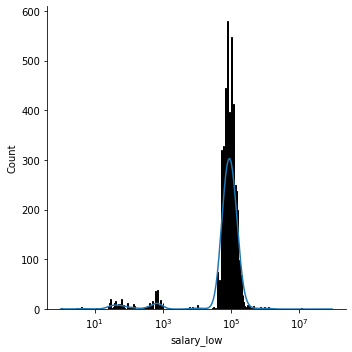

In [31]:
%time sns.displot(df[df.annual], x="salary_low", log_scale=True, kde=True)

*Most* of these are data mistakes

In [32]:
SALARY_ANNUAL_MIN_AUD = 20000

In [33]:
df[(df.salary_low < SALARY_ANNUAL_MIN_AUD) & df.annual].sort_values("salary_low", ascending=False).T

,10461,8542,10890,62274,3696,1673,9121,7153,6617,26908,6616,6561,4555,2269,10082,6553,979,61982,9210,19168,20004,4493,947,10047,10017,...,70814,66290,24791,31959,69580,62304,56684,34056,35491,66166,20657,32237,20630,54428,20658,68051,68537,54476,61120,20837,32918,34321,59921,64792,30895
title,Director of Client Services / Financial Controller,Safety Systems Engineer,Safety Systems Engineer,Digital Success Consultant - Education & Online Learning,"Senior Project Manager - Developer, Construction","Senior Project Manager - Developer, Construction","Senior Project Manager - Developer, Construction",Installation Supervisor (5months),Technical Project Manager,4 Assurance Mgrs- 6 Month Max Term contracts - $125k package,"Manager, Executive Services (Chief of Staff)",Executive Manager,"Manager, Executive Services (Chief of Staff)","Manager, Executive Services (Chief of Staff)","Manager, Executive Services (Chief of Staff)",Executive Manager,"Manager, Executive Services (Chief of Staff)",Systems / DevOps Engineer - MS Azure skills required,PMO Analyst,Clinical Educator,Solicitor for NSW and Tasmania,BI Specialist,BI Specialist,BI Specialist,BI Specialist,...,Customer Care Representative,Customer Servce Officer,EOI - General Laborers Required,Electrical Trade Assistant,Experienced Civil Workers,Machine op / Forklift driver,Traffic Controllers,Test post from idibu,Test post from idibu,Crew Leader,Lead Practitioner Children & Family Services,Registered Nurse,Case Manager Community Mental Health,Lead .Net Developer,Men’s Behaviour Change Program Facilitators x 2,Tyre Fitting Traineeship - Hawthorn,Tyre Fitting Traineeship - Chadstone,2nd or 3rd Year Carpentry Apprenticeship,Gas Supply Apprenticeships - Melb,Lawyer – Aboriginal Families Practice Team,SAP Customer Management,SAP Customer Management,ServiceNow Professional? Looking For a New Role?,VR GP - Melbourne,"Cadet Program 2020 - Information Technology Stream, Sydney"
description,"About the Company\nMy client is a bespoke outsourced finance function for small to medium enterprises which includes reporting, virtual CFO functi...","About the Company\nDavidson Technology have partnered with a multi-national defence, security and aerospace company who are building one of the wo...","About the Company\nDavidson Technology have partnered with a multi-national defence, security and aerospace company who are building one of the wo...",,"About the Company\n\nIndustrial developer which develops and manages real estate on behalf of key clients\nPublicly listed, highly regarded global...","About the Company\n\nIndustrial developer which develops and manages real estate on behalf of key clients\nPublicly listed, highly regarded global...","About the Company\n\nIndustrial developer which develops and manages real estate on behalf of key clients\nPublicly listed, highly regarded global...","The Company\nDavidson is delighted to be partnering with Goldwind, one of the world's leading wind power companies in their search for an Installa...","About the Company\nOur client is a multinational construction and infrastructure company they help people, clients, and communities do great thing...",This leading bank is seeking 4 Assurance professionals with excellent stakeholder management skills to join their Line 2 Assurance team on 6 month...,"A unique and rewarding opportunity has become available to join a growing, evolving and well-respected Not for Profit organisation. You will step ...","A unique and rewarding opportunity has become available to join a growing, evolving and well-respected Not for Profit organisation. You will step ...","A unique and rewarding opportunity has become available to join a growing, evolving and well-respected Not for Profit organisation. You will step ...","A unique and rewarding opportunity has become available to join a growing, evolving and well-respected Not for Profit organisation. You will step ...","A unique and rewarding opportunity has become available to join a gr

In [34]:
df.loc[(df.salary_low < SALARY_ANNUAL_MIN_AUD) & df.annual, "salary_valid"] = False

CPU times: user 438 ms, sys: 61.2 ms, total: 500 ms
Wall time: 397 ms


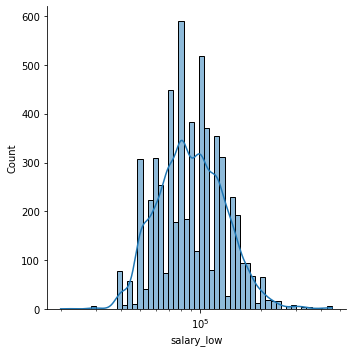

In [35]:
%time sns.displot(df[(df.salary_hours==2000) & (df.salary_valid)], x="salary_low", log_scale=True, kde=True)

## Weekly

CPU times: user 523 ms, sys: 89.7 ms, total: 613 ms
Wall time: 522 ms


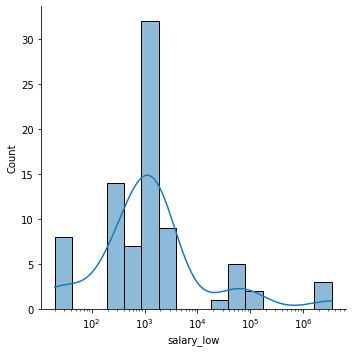

In [36]:
%time sns.displot(df[df.weekly], x="salary_low", kde=True, log_scale=True)

These are mainly bad parsing; could tighen up parsing here

In [37]:
SALARY_WEEKLY_MAX_AUD = 5000

In [38]:
df[df.weekly & (df.salary_low > SALARY_WEEKLY_MAX_AUD)].sort_values("salary_low").T

,21565,40654,62250,25836,68789,19335,20444,19957,59419,59863,60712
title,Become a taxi driver,Social Media Marketing Assistant (Part Time 3 days per week),Store Manager - Melbourne,Talent Resourcer,Run-Off Manager for Dairy Support,Office Manager – Community Colleges Australia,Registered Psychologist,HR Advisor,Election Managers,Election Managers,Election Manager
description,Need full driving victorian australian licence at least 1 year old . National police check and australian victorian driving license is must.\nIf a...,"About us\nWe are a dynamic and integrated creative marketing and brand agency, offering thoughtful creative design, strategic marketing and manage...",,"In this fast paced role, you'll work in a team of 3 Recruiters handling all office and call centre recruitment for our Sydney branch, along with p...",,"About the role\nCommunity Colleges Australia (CCA: www.cca.edu.au), the peak national body that represents community-owned, not-for-profit educati...",About the role\n\nAre you passionate about improving the health and wellbeing of Aboriginal people?\nJoin an influential and supportive Not-For-Pr...,About the role\nCHOICE is one of Australia’s leading independent online media organisations; one that plays a unique role in the Australian consum...,,,
uri,https://www.gumtree.com.au/s-ad/the-basin/other-jobs/become-a-taxi-driver/1258503131,https://www.seek.com.au/job/50730953?type=standard,https://www.seek.com.au/job/36497803,https://www.seek.com.au/job/40179061,https://www.seek.co.nz/job/36421441,https://probonoaustralia.com.au/jobs/2019/10/office-manager-community-colleges-australia/,https://probonoaustralia.com.au/jobs/2020/08/registered-psychologist/,https://probonoaustralia.com.au/jobs/2020/07/hr-advisor/,https://www.seek.com.au/job/36554346,https://www.seek.com.au/job/36554233,https://www.seek.com.au/job/36554178
view_date,2020-11-27 09:14:12+00:00,2020-10-28 20:38:22+00:00,2018-06-19 02:23:09,2019-10-17 09:07:41,2018-06-08 07:23:50,2020-05-29 10:49:54+00:00,2020-09-26 11:40:24+00:00,2020-11-26 22:39:23+00:00,2018-06-25 16:11:41,2018-06-25 16:29:12,2018-06-25 16:31:15
org,None,Lunchbox Agency,Hospoworld Resourcing,2evolve Pty Ltd,Rural People Ltd,Community Colleges Australia,Biripi Aboriginal Corporation Medical Centre,CHOICE,Hudson,Hudson,Hudson
salary_raw,$30000 plus if working 4 shifts a week,"$45,000 base (pro rata 3 days/week $27,000)",$60-65k + super + bonuses + 40 hours per week,To $65K (37.5hr Week),"$70,400 including a house. Rent $200 pw","up to $80,000 on a full-time equivalent basis (pro rata for days/hours worked: 3.5 to 4 days/week)","$83,000-$100,000. Flexible PT role (24hrs/week)!","$100,000 FTE Package including Superannuation (12 months fixed | 3 days per week)",$3500 - $4000k p.w.,$3500 - $4000k p.w.,$3500 - $4000k p.w.
salary_min,30000,45000,60000,65000,70400,80000,83000,100000,3.5e+06,3.5e+06,3.5e+06
salary_max,NaN,NaN,65000,NaN,NaN,NaN,100000,NaN,4e+06,4e+06,4e+06
salary_hours,40,40,40,40,40,40,40,40,40,40,40
location_raw,"The Basin, VIC","melbourne, Melbourne, Victoria, Australia","Melbourne, CBD & Inner Suburbs, AU","Sydney, New South Wales, Australia","Canterbury, North Canterbury, NZ",Sydney(Sydney CBD),NSW Regional(Taree),Sydney(Marrickville),"Wollongong, Illawarra & South Coast, AU","Sydney, AU","Lismore & Far North Coast, AU"


A mix of bad parsing and bad data

In [39]:
SALARY_WEEKLY_MIN_AUD = 300

In [40]:
df[df.weekly & (df.salary_low < SALARY_WEEKLY_MIN_AUD)].sort_values("salary_low", ascending=False).T

,21392,21814,59948,64898,26218,41154,37066,27951,24477,31541
title,Need a car for on-demand delivery and Uber?,Drivers Wanted Apply Now | Weekend work available,Communication and Media Manager,Credit Application Assessor,Warehouse Administrative Assistant,Data Entry | Casual,In-house Customer Workshop Assistant,RF Scanners/Voice Pickers,Labourer/ Truck Driver,Confident Brand Ambassadors
description,How does Splend work?\nWe provide eco-friendly and affordable cars so drivers can focus on earning an income.\nOur weekly Rent plans give ultimate...,How does Splend work?\nWe provide eco-friendly and affordable cars so drivers can focus on earning an income.\nOur weekly Rent plans give ultimate...,,,Fantastic opportunity for an Administrative Assistant to join the Warehouse team in this newly created role! Our Operations team have recently int...,"About the business\nOur client has been providing manufacturing and related services to the Authentication, Payment and Secure Access sector since...",Our client is a National Distributor and 3PL Supply Chain provider located in Mile End (SA). They proudly boast solid partnerships with their clie...,Our clients are looking for experienced RF Scanners and/or Voice pickers to work in Southern and South Eastern Suburbs casually on either day or a...,Perth based scrap metal recycling company is seeking a casual person to assist in both yard operations and product pick-ups. To be considered for ...,Our client Acquire Direct is in search of 5 outgoing personalities who thrive on a fast-paced environment and are looking for a challenge. Special...
uri,https://www.gumtree.com.au/s-ad/north-adelaide/other/need-a-car-for-on-demand-delivery-and-uber-/1226531757,https://www.gumtree.com.au/s-ad/brunswick/other/drivers-wanted-apply-now-weekend-work-available/1226530424,https://www.seek.com.au/job/36554632,https://www.seek.co.nz/job/37438784,https://www.seek.com.au/job/39936999,https://www.seek.com.au/job/50759000?type=standard,https://www.seek.com.au/job/41366535?type=standout,https://www.seek.com.au/job/40002217,https://www.seek.com.au/job/39870184,https://www.seek.com.au/job/39887756
view_date,2020-07-04 17:30:54+00:00,2020-10-27 15:58:15+00:00,2018-06-25 16:32:50,2018-10-11 01:47:47,2019-09-13 06:49:34,2020-10-24 09:14:45+00:00,2020-05-25 11:47:54+00:00,2019-09-23 07:08:05,2019-09-05 08:42:40,2019-09-07 07:33:18
org,None,None,Corin Forest Mountain Retreat,Madison Recruitment Ltd,Boardriders,ProQuest Recruitment - Dandenong,Jobwire,ProQuest Recruitment - Dandenong,Wolfram Metal Recyclers,Wow Recruitment
salary_raw,Prices from $199&#47;week,Rent from $199&#47;week,$30 - $40 per hourUp to 38hrs p/week,Competitive salary for 30 hours/ week,28 hours/week across Monday to Friday,$27 - $28 p.w.,Up to $26 p.w.,$25 - $36 p.w.,$20 - $29.99 per hour30-38 hours a week,$20.00-$24.00/hourOTE $1000 + /week
salary_min,199,199,30,30,28,27,26,25,20,20
salary_max,None,NaN,40,NaN,NaN,28,NaN,36,29.99,24
salary_hours,40,40,40,40,40,40,40,40,40,40
location_raw,North Adelaide SA,Brunswick VIC,"ACT, AU","Auckland, Manukau & East Auckland, NZ","South West Coast VIC, Victoria, Australia","dandenongsouth, Melbourne, Victoria, Australia","mileend, Adelaide, South Australia, Australia","Melbourne, Victoria, Australia","Perth, Western Australia, Australia","Sydney, New South Wales, Australia"


We could mark these as annual... slight bias to exclude them, but small in number

In [41]:
df.loc[df.weekly & (df.salary_low < SALARY_WEEKLY_MIN_AUD), "salary_valid"] = False

In [42]:
df.loc[df.weekly & (df.salary_low > SALARY_WEEKLY_MAX_AUD), "salary_valid"] = False

CPU times: user 323 ms, sys: 50.6 ms, total: 374 ms
Wall time: 269 ms


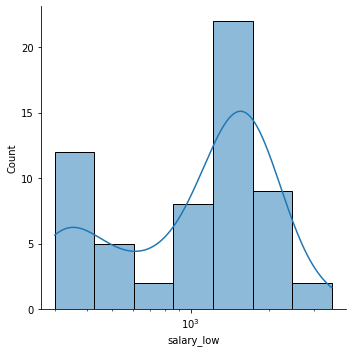

In [43]:
%time sns.displot(df[df.weekly & df.salary_valid], x="salary_low", kde=True, log_scale=True)

## Daily

CPU times: user 593 ms, sys: 58.6 ms, total: 651 ms
Wall time: 550 ms


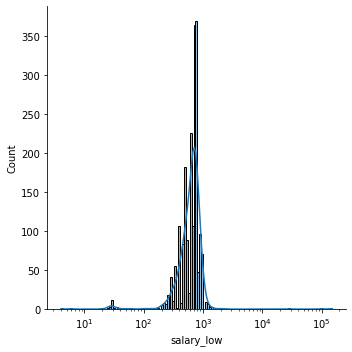

In [44]:
%time sns.displot(df[df.daily], x="salary_low", kde=True, log_scale=True)

Mix of bad data and parsing

In [45]:
df[df.daily & (df.salary_low > 3000)].sort_values('salary_low').T

,73423,29338,32448,35501
title,Aboriginal Identified - Clerk General Scale - Cadetship Program - Various Locations - Temporary,Management Accountant - 9 day fortnight,Data Dev and Gov Analyst,Data Dev and Gov Analyst
description,"ABOUT LEGAL AID NSW\nLegal Aid NSW is the largest legal aid agency in Australia, comprising of a Central Sydney office and 26 regional offices in ...",Our client is a high profile public-sector organisation located in the inner Bayside / Georges River Council suburban area within easy access of t...,Government agency looking for a to be a strong player in the implementation of a green field Big Data environment whilst cross-skilling with other...,Government agency looking for a to be a strong player in the implementation of a green field Big Data environment whilst cross-skilling with other...
uri,https://iworkfor.nsw.gov.au/job/aboriginal-identified-clerk-general-scale-cadetship-program-various-locations-temporary-212912,https://www.seek.com.au/job/39843065,https://jobs.launchrecruitment.com.au/job/100602033311507/data-dev-and-gov-analyst/,https://jobs.launchrecruitment.com.au/job/100602033311507/data-dev-and-gov-analyst/
view_date,2020-10-21 22:35:08+00:00,2019-09-02 10:54:58,2020-05-26 20:13:28+00:00,2020-09-29 13:50:58+00:00
org,"Legal Aid Commission, Office of the",Pacific Search Partners,Launch Recruitment,Launch Recruitment
salary_raw,"• Salary package of up to $27,700 including study and book allowances for a 60-day placement",Circa $100K + super for a 9 day/fortnight,$150000 - $180000 per day,$150000 - $180000 per day
salary_min,27700,100000,150000,150000
salary_max,NaN,NaN,180000,180000
salary_hours,8,8,8,8
location_raw,Sydney Region,"Sydney, New South Wales, Australia","Parramatta, AU","Parramatta, AU"


Many of these seem suss..

In [46]:
df[df.daily & (df.salary_min < 100)].sort_values('salary_min', ascending=False).T

,62595,71103,29321,35628,33287,34739,26735,32806,35832,32513,38755,34213,38782,65932,9808,35074,7886,33609,35842,28062,37935,64256,31186,31221,63834,...,33639,33475,33466,33462,33450,33424,33413,33502,33509,33560,33568,33573,33574,33578,33590,33591,33594,33598,33612,33615,33625,33628,33630,33635,34612
title,PHP Developer,Development Services Officer,Child Protection Assessment Officer,Training Coordinator,Training Coordinator,Training Coordinator,Records and Scanning Administration Officers (work with a Qld Government dept),Team Leader - Speak Out Program,Call Centre Operator,Call Centre Operator,Production Assistant,Team Leader - Speak Out Program,Warehouse Staff Needed,Customer Service Representative (Inbound),Contact Centre Consultant| HR Advice|Payroll|Casual Pool,Receptionist,Contact Centre Consultant| HR Advice|Payroll|Casual Pool,Receptionist,Receptionist,Warehouse Operators,Assistant Educator,Forklift Driver - Day Shift,Packing Staff - Dairy Industry - Day and Afternoon Shift,Container Unloaders/General Labourers,Class 1 Driver - $20.50 per hour,...,Scrum Master,Senior Release / Deployment Manager,Web Automation Test Specialist,Team Assistant,Team Assistant,MYSQL Architect,Personal Assistant,.Net developer,System Access Administrator,Front End developer- Angular,IT recruiter,Full Stack developer,Solution Architect,Back end developer,Field Supervisor,Network Design role,iOS Developer,AWS Architect,Citrix SME,Splunk Architect,Scrum Master,Technology Analyst,IT support role,Test Analyst (Salesforce & Insurance Experience),Recruitment Coodinator Lead
description,,,BENEFITSDarlinghurst location 8 Month Temporary AssignmentChild protection THE COMPANYpeople2people are collaborating with the NSW Government who ...,Fantastic opportunity to work for a leading government agency who specialise in health and safety. Our client is undergoing a large scale transfor...,Fantastic opportunity to work for a leading government agency who specialise in health and safety. Our client is undergoing a large scale transfor...,Fantastic opportunity to work for a leading government agency who specialise in health and safety. Our client is undergoing a large scale transfor...,We are urgently seeking Records and Scanning Administration Officers with strong attention to detail to join our temporary team working with a pro...,"Weave is seeking an experienced Team Leader to join the team.\nProviding leadership, support and coordination of Weave’s Speak Out Dual Diagnosis ...",Opportunity to work with a leading reputable government agency who are building a new online platform. This role will be shift work - 5 days per d...,Opportunity to work with a leading reputable government agency who are building a new online platform. This role will be shift work - 5 days per d...,"We have a great opportunity for experienced Production Assistants to join a reputable printing organisation located in Craigieburn.\nOur client, l...","Weave is seeking an experienced Team Leader to join the team.\nProviding leadership, support and coordination of Weave’s Speak Out Dual Diagnosis ...","Labourforce has potions available for suitable candidates with our valued client based in Acacia Ridge due to increased work load, they are an ind...",,About the company:\nOur client is a leading national organisation with a fantastic reputation for providing a valuable service to its customers an...,Join an exciting Receptionist role for one of our IT clients based in North Sydney for an initial 6 months contract with a view to extend. You wil...,About the company:\nOur client is a leading national organisation with a fantastic reputation for providing a valuable service to its customers an...,Join an exciting Receptionist role for one of our IT clients based in North Sydney for an initial 6 months contract with a view to extend. You wil...,Join an exciting Receptionist role for one of our IT clients based in North Sydney for an initial 6 months contract with a view to extend. You wil

In [47]:
SALARY_DAILY_MAX_AUD = 3000

In [48]:
SALARY_DAILY_MIN_AUD = 100

In [49]:
df.loc[df.daily & (df.salary_low < SALARY_DAILY_MIN_AUD), "salary_valid"] = False

In [50]:
df.loc[df.daily & (df.salary_low > SALARY_DAILY_MAX_AUD), "salary_valid"] = False

CPU times: user 374 ms, sys: 69.6 ms, total: 444 ms
Wall time: 343 ms


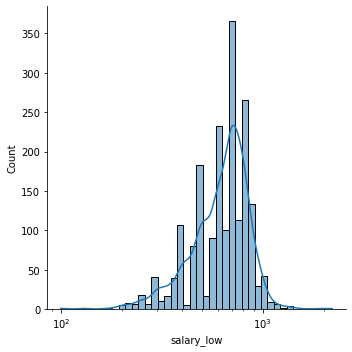

In [51]:
%time sns.displot(df[df.salary_valid & df.daily], x="salary_low", kde=True, log_scale=True)

## Hourly

CPU times: user 954 ms, sys: 60.7 ms, total: 1.01 s
Wall time: 897 ms


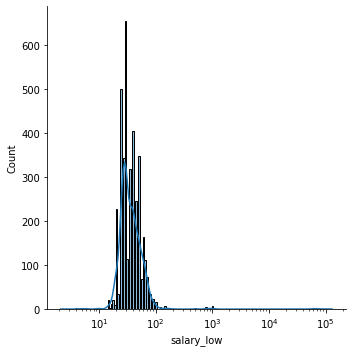

In [52]:
%time sns.displot(df[df.hourly], x="salary_low", kde=True, log_scale=True)

Bad parsing and bad data

In [53]:
df[df.hourly & (df.salary_low > 250)].sort_values("salary_low").T

,5238,8787,70468,212,9041,9107,51798,30332,30199,27985,24474,24053,19691,69134,26038,53100,53139,19659,65741,40904,70924
title,Strategic Innovation Manager - National Initiatives and Performance,Strategic Innovation Manager - National Initiatives and Performance,PERSONAL CARE ASSISTANT,Senior Business Implementation Consultant,Business Implementation Consultant,Senior Business Implementation Consultant,Children's Services Officer - Room Leader,Retail Assistants Wanted - Sales & Promotions!,Hospitality Workers - Promotion People Wanted!,Customer Service And Marketing Consultants Wanted! Immediate Starts Available!,Campaign Managers Wanted! New Summer Sales Campaigns About To Begin!,Retail Assistants Wanted - Promotion Sales!,Financial Counsellor (Integrated Services Project),Spray Painter- Kitchens,Mid-Level Finished Artist,"Radiographers (Shift) - Medical Imaging Department, Cairns","Radiographers (Shift) - Medical Imaging Department, Cairns",Community Lawyer (Integrated Services Project),Leading Hand,F45 Head Coach / Trainer,Senior Contract Administrator
description,About the Role\nThe main purpose of this role is to manage the implementation of the Catalyst Lab Innovation Program which aims to support the ide...,About the Role\nThe main purpose of this role is to manage the implementation of the Catalyst Lab Innovation Program which aims to support the ide...,,"Our client is a major insurance organisation that is well recognized in the industry. They provide innovative, competitive and flexible solutions ...","Our client is a major insurance organisation that is well recognized in the industry. They provide innovative, competitive and flexible solutions ...","Our client is a major insurance organisation that is well recognized in the industry. They provide innovative, competitive and flexible solutions ...",Full Time Scone The Role: Council is seeking an energetic and enthusiastic individual to undertake the above position. The successful candidate w...,"Our client, HQ Direct are looking for individuals who have huge personalities to employ their skills to the fast paced and highly social face to f...","Our client, HQ Direct are looking for individuals who have huge personalities to employ their skills to the fast paced and highly social face to f...",Wow Recruitment is on the hunt for social and bubbly guys and girls to join our client’s team. HQ Direct are launching some brand-new promotional ...,POP Advertising is looking for the next wave of campaign managers and sales agents to kickstart our new summer campaigns. We are looking for indiv...,"Our client, HQ Direct are looking for individuals who have huge personalities to employ their skills to the fast paced and highly social face to f...","About the role\n18 hours per week – 12 month fixed term, based in Fitzroy, Victoria\nSocial Security Rights Victoria and the Financial and Consume...","Spray Painter Required. Our family run property services business, based on the North Side of Brisbane is currently looking for a experienced 2 Pa...","At the Y, we believe in the power of inspired young people. A community not-for-profit organisation with 17 million participations annually across...",,,"About the role\n30.4 hours per week – 12 month fixed term, based in Fitzroy, Victoria\nSocial Security Rights Victoria and the Financial and Consu...",,"JOIN SYDNEY’S PREMIER F45 STUDIO!\nApply for this role at www.bit.ly/F45job\nDo you get freakin' excited and pride yourself on providing fun, fres...",
uri,https://www.davidsonwp.com/job/100562133239422/strategic-innovation-manager-national-initiatives-and-performance-1/,https://www.davidsonwp.com/job/100562133239422/strategic-innovation-manager-national-initiatives-and-performance/,https://www.seek.com.au/job/37565380,https://www.davidsonwp.com/job/100562133256145/senior-business-implementation-consultant-1/,https://www.davidsonwp.com/job/100562133253698/business-implementation-consultant/,https://www.davidsonwp.com/job/1005621332561

In [54]:
SALARY_HOURLY_MAX_AUD = 300

In [55]:
df.loc[df.hourly & (df.salary_low > SALARY_HOURLY_MAX_AUD), "salary_valid"] = False

CPU times: user 347 ms, sys: 49.8 ms, total: 397 ms
Wall time: 295 ms


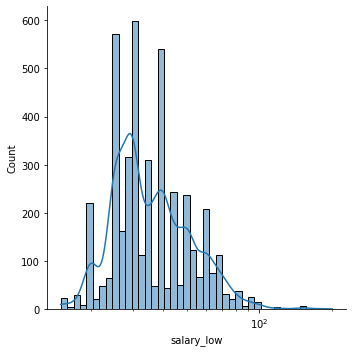

In [56]:
%time sns.displot(df[df.hourly & df.salary_valid], x="salary_low", kde=True, log_scale=True)

# Inferring Period

It's easy to separate annual from everything else

Weekly is pretty rare.

There's some overlap between hourly and daily.

In [57]:
SALARY_MIN_AUD, SALARY_HOURLY_MAX_AUD, SALARY_MIN_AUD*2000, SALARY_HOURLY_MAX_AUD*2000

(15, 300, 30000, 600000)

In [58]:
SALARY_DAILY_MIN_AUD, SALARY_DAILY_MAX_AUD, SALARY_DAILY_MIN_AUD*250, SALARY_DAILY_MAX_AUD*250

(100, 3000, 25000, 750000)

In [59]:
SALARY_WEEKLY_MIN_AUD, SALARY_WEEKLY_MAX_AUD, SALARY_WEEKLY_MIN_AUD*50, SALARY_WEEKLY_MAX_AUD*50

(300, 5000, 15000, 250000)

In [60]:
SALARY_ANNUAL_MIN_AUD, SALARY_MAX_AUD

(20000, 500000)

In [61]:
df[df.salary_valid].groupby("salary_hours").agg(min=('salary_low', 'min'), max=('salary_low', 'max'), n=('salary_low', 'count'))

,min,max,n
salary_hours,,,
1.0,15.0,200.0,4390
8.0,100.0,2200.0,1945
40.0,300.0,3500.0,60
2000.0,20000.0,455245.0,5777


In [62]:
len(df[df.salary_low.between(100, 200) & df.salary_valid & (~df.hourly) & (~df.daily)])

17

In [63]:
ANNUAL_HOURS = 2000
WEEKLY_HOURS = 40
DAILY_HOURS = 8
HOURLY_HOURS = 1

salary_periods = {
    (SALARY_ANNUAL_MIN_AUD, SALARY_MAX_AUD): ANNUAL_HOURS,
    # Exclude as is quite rare
    #(SALARY_WEEKLY_MIN_AUD, SALARY_WEEKLY_MAX_AUD): WEEKLY_HOURS,
    (SALARY_DAILY_MIN_AUD, SALARY_DAILY_MAX_AUD): DAILY_HOURS,
    (SALARY_MIN_AUD, SALARY_HOURLY_MAX_AUD): HOURLY_HOURS,
}

In [64]:
def infer_salary_hours(salary):
    possible_periods = [(low, hi) for (low, hi) in salary_periods if low < salary < hi]
    if len(possible_periods) == 1:
        return salary_periods[possible_periods[0]]
    # Ambiguous or no match

Too high

In [65]:
infer_salary_hours(500_000)

Annual

In [66]:
infer_salary_hours(20_000)

Between annual and daily

In [67]:
infer_salary_hours(3_000)

Daily

In [68]:
infer_salary_hours(300)

8

Ambiguous: Could between hourly and daily

In [69]:
infer_salary_hours(200)

Hourly

In [70]:
infer_salary_hours(100)

1

In [71]:
df['inferred_salary_hours'] = np.nan

In [72]:
df.loc[df.salary_valid, 'inferred_salary_hours'] = df.salary_hours

In [73]:
df.loc[df.salary_valid & df.inferred_salary_hours.isna(), 'inferred_salary_hours'] = df.salary_min.apply(infer_salary_hours)

In [74]:
sum(~df.salary_hours.isna()), sum(~df.inferred_salary_hours.isna())

(13808, 21308)

In [75]:
df.inferred_salary_hours.value_counts().to_frame()

,inferred_salary_hours
2000.0,14596
1.0,4606
8.0,2046
40.0,60


In [76]:
df['annual_salary'] = (df['salary_low'] * 2000/df['inferred_salary_hours']).astype('float64')

In [77]:
df[~df.annual_salary.isna()].sort_values('annual_salary').T

,21604,63681,63662,63827,63833,63693,64234,64706,63502,64235,23120,21684,20546,31633,67952,63864,63333,33858,35338,30703,56429,30197,6373,66502,40723,...,6672,6676,16060,14936,11470,36846,36849,56183,4418,6361,55340,63354,60979,10005,51930,57456,8061,2312,6733,10168,8222,66680,19652,54603,61876
title,Sales Specialists | Earner Exceed $AUD 2000 weekly | Apply Now!,2019 Aboriginal and Torres Strait Islander Childrens Services Traineeship,2019 Childrens Services Traineeship for Persons with a Disability,2019 Business Administration Traineeships,2019 Childrens Services Traineeship,2019 Childrens Services Traineeship,2019 Information Technology Traineeships for Persons with a Disability,2019 Business Administration Traineeships for Persons with a Disability,2019 Business Administration Traineeships for Persons with a Disability,2019 Business Administration Traineeships,IT Support Technician Traineeship,Aupair required Mosman Full-time hours $400 per week,Non Executive Director,Apprentice Plumber,Graphic Designer - Fixed Term,Travel & Tourism Tutor,Senior Hair Stylist,Amazing Job 7 expired,Amazing Job 7 expired,Full-Time Legal Receptionist & Conveyancing Assistant,Air-Conditioning Trade Assistant,Junior Warehouse,2 x Java Developers,Test Analyst,Part Time Sports Coach,...,Corporate Services Executive,Strategy & Performance Executive,Fire Safety SME - Transport,Fire Safety SME - Transport,Fire Safety SME - Transport,Visiting Medical Officer - Anaesthetics or Intensive Care Unit,Visiting Medical Officer - Anaesthetics or Intensive Care Unit,Senior Staff Specialist or Staff Specialist (Psychiatrist) (Bundaberg),Chief Executive Officer - WorkSafe Victoria,Chief Executive Officer - WorkSafe Victoria,Senior Project Manager,Senior Solutions Architect - Brand New Role - Up to $400K PKG,Executive Director of Medical Services (Bundaberg),Health Service Chief Executive,Receptionist,"Emergency Medicine Specialists, CMOs or Registrars",Health Service Chief Executive,"Group Executive, Strategy, Planning & Transformation","Group Executive, Strategy, Planning & Transformation","Group Executive, Strategy, Planning & Transformation","Group Executive, Strategy, Planning & Transformation",GP SMO - Remote Reliever,Co-opted Board member,Career Medical Officer Locum SA,Radiographer
description,"A great business opportunity, with UNLIMITED COMMISSIONS,UNCAPPED!\nIf you’ve got the skills and you’re ready to work with agrowing, dynamic compa...",,,,,,,,,,Xenontech is the Premier IT Support Company for NSW Schools. Xenontech is offering an exciting opportunity for any aspiring Desktop/Network Suppor...,Mother’s help/ au pair required for two girls 2 and 4.\nFull-time hours required.\nCall or text Amy\n6981 + click to reveal\nREVEAL_DETAILS\n,About the role\nWorkways Australia Ltd is seeking applications from suitably qualified people with a passion for making a positive social impact i...,QBuild invites applications for plumbing apprenticeship positions in the following locations to commence in March 2020: Apprentice Plumber - Rockh...,,,,"This Amazing Job will change your life.\nTe labores probatus vis, equidem offendit ius ex. Ea latine rationibus eos, at modus vocent ullamcorper m...","This Amazing Job will change your life.\nTe labores probatus vis, equidem offendit ius ex. Ea latine rationibus eos, at modus vocent ullamcorper m...",Applications are invited for the position of a full-time Legal Receptionist and Conveyancing Assistant. (Monday - Friday 8.15 am - 4.45 pm) Candi...,,"About the business Contract coffee roasting business located in Clayton. About the role Enthusiastic, friendly, reliable, trustworthy person w...",About the Company\nJ oin a global company putting technology at their forefront! They’re looking to grow out they’re Brisbane team and give you th...,,Due to increased demands in our sporting and educational programs we are seeking up to three permanent-part time Sports Coach for 2021 (up to 20 h...,...,"Brisbane Catholic Educ

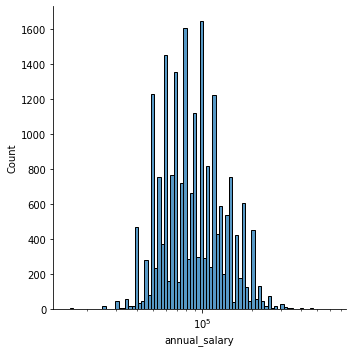

In [78]:
sns.displot(df, x='annual_salary', log_scale=True)